# Import packages

In [1]:
#install.packages("tidyverse")
install.packages("lavaan")
install.packages("parameters")
install.packages("svglite")
install.packages("psych")
install.packages("GPArotation")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘mnormt’, ‘pbivnorm’, ‘numDeriv’, ‘quadprog’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bayestestR’, ‘datawizard’, ‘insight’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘GPArotation’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
library(stats)
library(tidyverse)
library(psych)
library(GPArotation)
library(lavaan)
library(parameters)
library(svglite)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.1     ✔ stringr   1.5.2
✔ ggplot2   4.0.0     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha



Attaching package: ‘GPArotation’


The following objects are masked from ‘package:psych’:

    equamax, varimin


This is lavaan 0.6-20
lavaan is FREE software! Please report any bugs.


Attaching package: ‘lavaan’


The following object is masked from ‘package:psych’:

    cor2cov




# Load data

Mounting google drive didn't work on my machine. So I uploaded the file (Task2_scenario_ratings_AC_Var_Mean.csv and factor_full_vis.csv) from the 'data' folder to the colab.

Also later the output will be saved in co-lab temporarily, will need to download and save to our folder.

In [25]:
data_ratings = read_csv('content/Task2_scenario_ratings_AC_Var_Mean.csv')
data_ratings <- data_ratings %>% column_to_rownames(., var = '...1')
# only use a subset of columns
data_motivation <- data_ratings %>% select(Empathy, Des_Norm, Inj_Norm, Cost_S_H, Benefit_O_H, Reciprocity, Mood, Reputation, Pos_SelfConcept,
                                              Cost_O_NH, Guilt, Neg_SelfConcept)
# drop na as fa cannot take nan as input
data_motivation <- data_motivation %>% drop_na()

New names:
• `` -> `...1`
Rows: 100 Columns: 17
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ...1, Other
dbl (15): Empathy, Urgency, Des_Norm, Inj_Norm, Cost_S_H, Benefit_O_H, Recip...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# Factor Analysis

Parallel analysis suggests that the number of factors =  2  and the number of components =  NA 


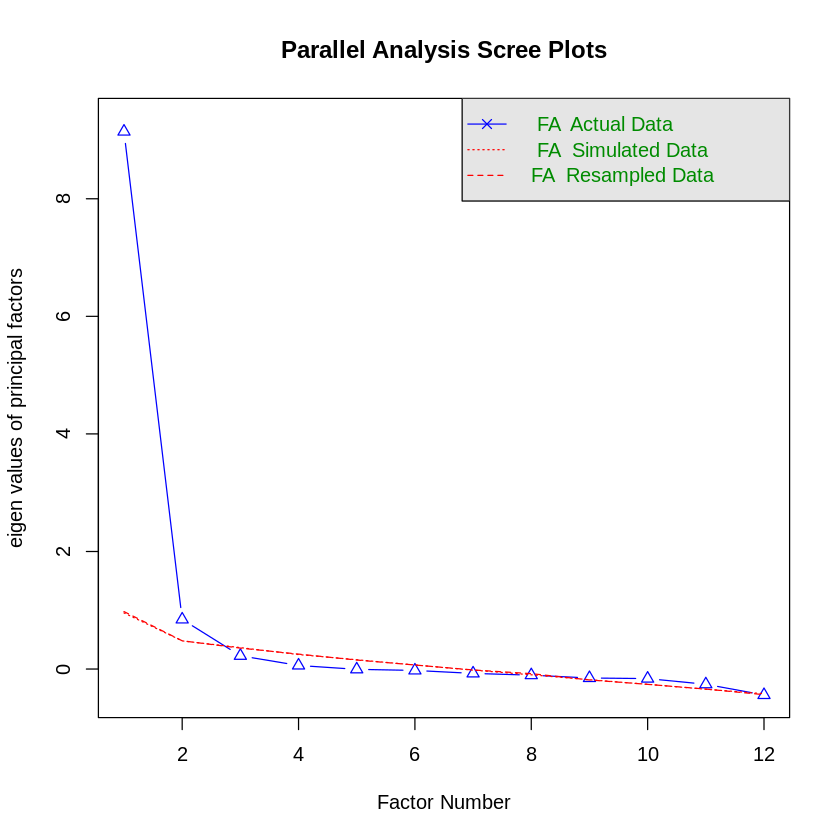

In [26]:
# parallel analysis to see the number of factors
res_parallel <- fa.parallel(data_motivation, fm='ml', fa='fa')

## Varimax: orthogonal solution (default)

Because the promax (oblique rotation) indicates factor 1 and factor 2 are not correlated (0.01), we can use the orthogonal rotaion.

In [32]:
# fa
fa_varimax_fa <- fa(data_motivation, # input data
              nfactors = 2, # number of factors
              rotate = "varimax", # rotation
              scores = "regression",
             fm = "minres") # factor score estimation
fa_varimax_fa


Factor Analysis using method =  minres
Call: fa(r = data_motivation, nfactors = 2, rotate = "varimax", scores = "regression", 
    fm = "minres")
Standardized loadings (pattern matrix) based upon correlation matrix
                 MR1   MR2   h2    u2 com
Empathy         0.90  0.02 0.81 0.185 1.0
Des_Norm        0.91 -0.30 0.92 0.079 1.2
Inj_Norm        0.93 -0.30 0.95 0.049 1.2
Cost_S_H        0.02  0.81 0.66 0.336 1.0
Benefit_O_H     0.94  0.16 0.91 0.091 1.1
Reciprocity     0.94 -0.05 0.88 0.122 1.0
Mood            0.88  0.11 0.79 0.211 1.0
Reputation      0.85  0.47 0.94 0.064 1.6
Pos_SelfConcept 0.88  0.34 0.89 0.106 1.3
Cost_O_NH       0.87  0.23 0.82 0.182 1.1
Guilt           0.95  0.15 0.93 0.073 1.0
Neg_SelfConcept 0.95  0.16 0.92 0.076 1.1

                       MR1  MR2
SS loadings           9.11 1.32
Proportion Var        0.76 0.11
Cumulative Var        0.76 0.87
Proportion Explained  0.87 0.13
Cumulative Proportion 0.87 1.00

Mean item complexity =  1.1
Test of the hypot

In [33]:
fa_varimax_loading = loadings(fa_varimax_fa)

In [35]:
# save factor scores
write.csv(fa_varimax_fa$scores, file = "FA_scores.csv",row.names = TRUE)

## Promax: allow correlation among factors  

In [27]:
# try the fa() in psych package
fa_promax_fa <- fa(data_motivation, # input data
              nfactors = 2, # number of factors
              rotate = "promax", # rotation
              scores = "regression",
             fm = "ml") # factor score estimation
fa_promax_fa

Factor Analysis using method =  ml
Call: fa(r = data_motivation, nfactors = 2, rotate = "promax", scores = "regression", 
    fm = "ml")
Standardized loadings (pattern matrix) based upon correlation matrix
                 ML1   ML2   h2    u2 com
Empathy         0.90 -0.03 0.81 0.188 1.0
Des_Norm        0.88 -0.44 0.97 0.033 1.5
Inj_Norm        0.90 -0.42 0.98 0.015 1.4
Cost_S_H        0.09  0.70 0.50 0.502 1.0
Benefit_O_H     0.94  0.06 0.88 0.120 1.0
Reciprocity     0.92 -0.12 0.85 0.147 1.0
Mood            0.87 -0.04 0.75 0.246 1.0
Reputation      0.86  0.27 0.82 0.175 1.2
Pos_SelfConcept 0.89  0.18 0.83 0.172 1.1
Cost_O_NH       0.91  0.22 0.88 0.116 1.1
Guilt           0.97  0.11 0.96 0.037 1.0
Neg_SelfConcept 0.97  0.11 0.96 0.040 1.0

                       ML1  ML2
SS loadings           9.15 1.06
Proportion Var        0.76 0.09
Cumulative Var        0.76 0.85
Proportion Explained  0.90 0.10
Cumulative Proportion 0.90 1.00

 With factor correlations of 
     ML1  ML2
ML1 1.00 0

In [28]:
fa_promax_loading = loadings(fa_promax_fa)

# Make plots

## Parallel analysis

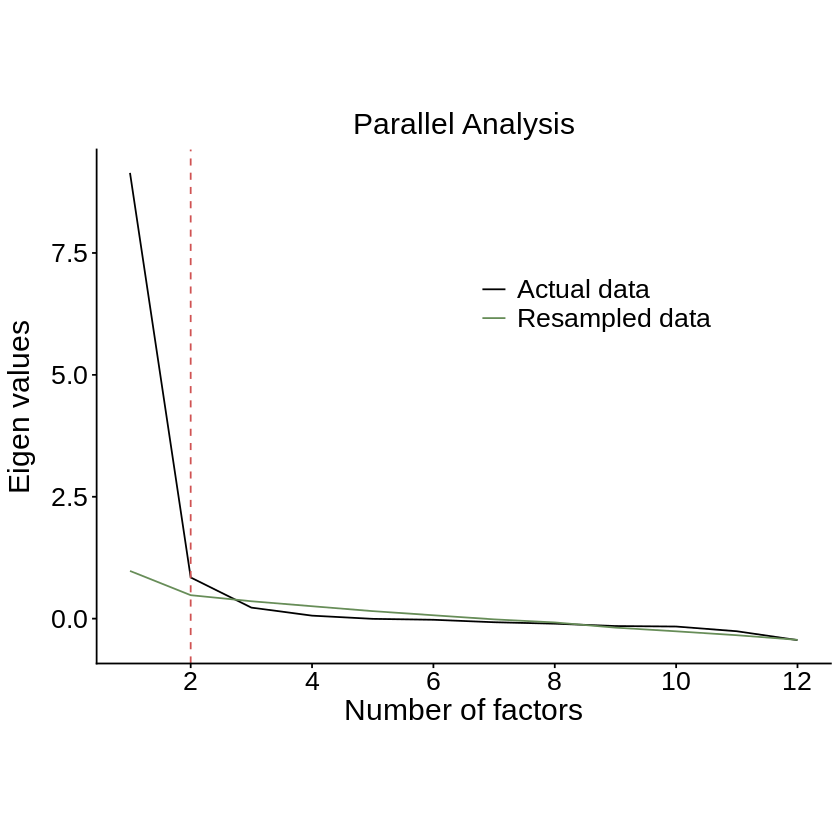

In [48]:
data_paral = tibble(num_fa = 1:12, fa_actual = res_parallel$fa.values[1:12], fa_resamp = res_parallel$fa.simr[1:12])
colors <- c("Actual data" = "black", "Resampled data" = "#678D58")
p_parel <- ggplot(data=data_paral) +
  geom_line(aes(x=num_fa, y = fa_actual,color="Actual data")) +
  geom_line(aes(x=num_fa, y = fa_resamp,color = "Resampled data"))+
  labs(title="Parallel Analysis",x="Number of factors", y = "Eigen values",color = "Legend") +
  geom_vline(xintercept = 2, linetype="dashed",color = "#D05353")+
  theme_classic() +
  theme(legend.position = c(0.7, 0.7),legend.title = element_blank(),legend.text = element_text(size=16),
        plot.title = element_text(hjust = 0.5,size=18),axis.title=element_text(size=18),
        axis.text.x = element_text(size = 16), axis.text.y = element_text(size=16), aspect.ratio=0.7)+
  scale_color_manual(values = colors)+
  scale_x_continuous(breaks = c(2, 4, 6, 8, 10, 12))

p_parel

ggsave("Fig_S3b.svg",plot =p_parel,path = "/",
       width = 120,height = 105, units = "mm",limitsize = FALSE, dpi=300)


## Cumulative explained variance

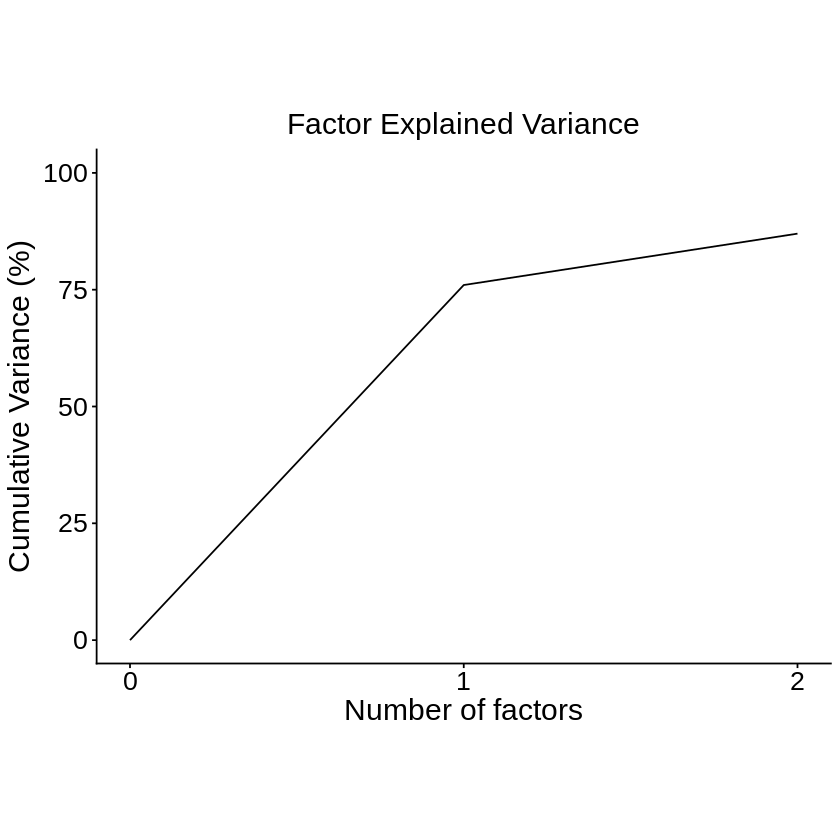

In [47]:
var_exp = c(0,0.76,0.87)*100
p_EV <- ggplot() +
  geom_line(aes(x=c(0:2), y = var_exp)) +
  labs(title="Factor Explained Variance",x="Number of factors", y = "Cumulative Variance (%)") +
  theme_classic() +
  scale_x_continuous(breaks=c(0:8)) +
  ylim(0,100) +
  theme(legend.position = c(0.8, 0.5),legend.title = element_blank(),legend.text = element_text(size=16),
        plot.title = element_text(hjust = 0.5,size=18),axis.title=element_text(size=18),
        axis.text.x = element_text(size = 16), axis.text.y = element_text(size=16), aspect.ratio=0.7)
p_EV
ggsave("Fig_S3c.svg",plot =p_EV,path = "/",
       width = 120,height = 105, units = "mm",limitsize = FALSE, dpi=300)


## Factor loadings

Rows: 24 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): text, item, name
dbl (1): loadings

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


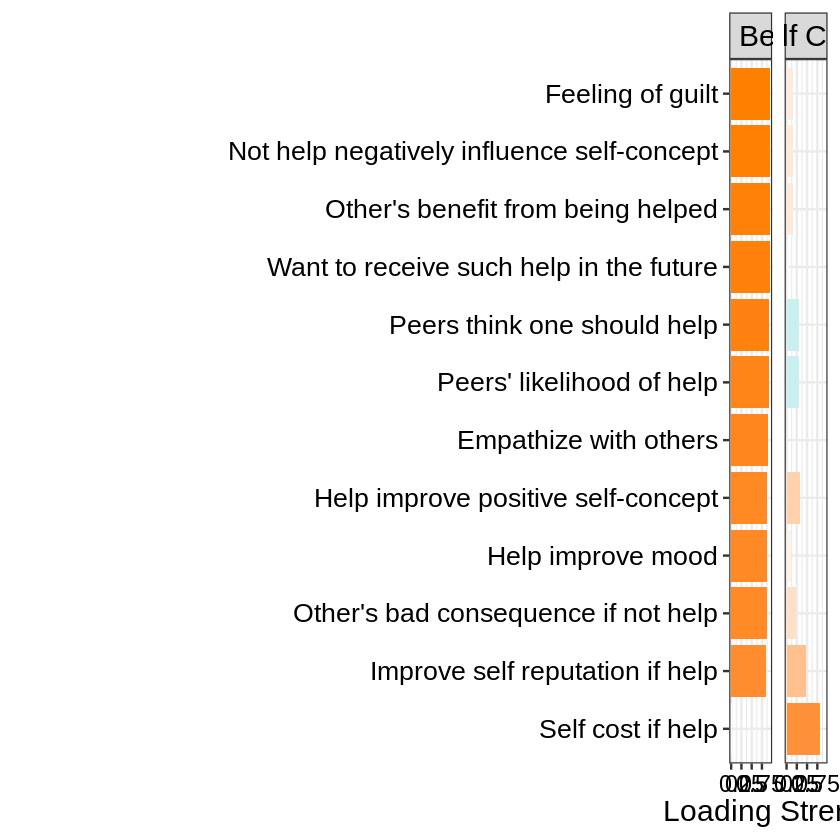

In [46]:
factor_full = read_csv("factor_full_vis.csv")
p_factors <- ggplot(factor_full, aes(fct_inorder(text), abs(loadings), fill=loadings)) +
  facet_wrap(~ name, nrow=1) + #place the factors in separate facets
  geom_bar(stat="identity") + #make the bars
  coord_flip() + #flip the axes so the test names can be horizontal
  scale_x_discrete(limits=rev) +
  scale_y_continuous(breaks=c(0, 0.25, 0.5,0.75,1), labels=c('0','0.25','0.5','0.75','1'))+
  scale_fill_gradient2(name = "Loading",
                       high = "darkorange1", mid = "white", low = "darkturquoise",
                       midpoint=0, guide='none') +
  ylab("Loading Strength") + xlab('') +
  theme_bw(base_size=15) +
  theme(strip.text.x = element_text(size = 18, colour = "black"),axis.title = element_text(size=18),
        axis.text.y = element_text(size=16,colour="black"),plot.title = element_text(size = 20, face = "bold"),
        axis.text.x = element_text(size=14,colour="black"))
p_factors
ggsave("Fig_S3d.svg",plot =p_factors,path = "/",
       width = 240,height = 150, units = "mm",limitsize = FALSE,dpi=500)

In [41]:
# correlation between varimax and promax
cor(fa_promax_loading,fa_varimax_loading)

,MR1,MR2
ML1,0.9959843,-0.6681279
ML2,-0.6962289,0.9839033


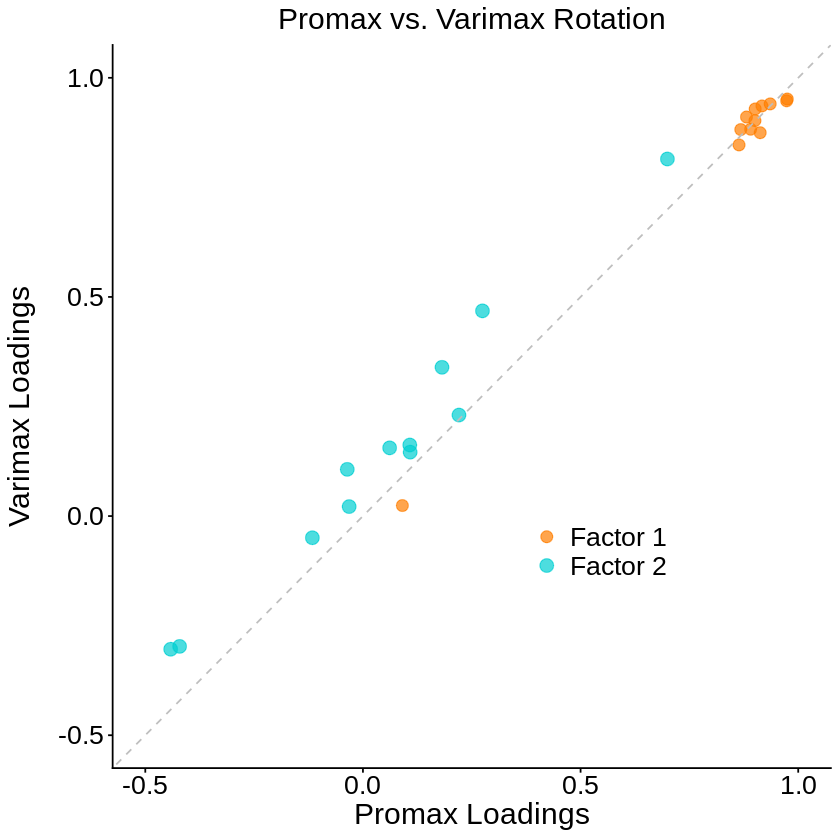

In [45]:
# Create a data frame for plotting
plot_data <- data.frame(ML1 = fa_promax_loading[, "ML1"], MR1 = fa_varimax_loading[, "MR1"],
                        ML2 = fa_promax_loading[, "ML2"], MR2 = fa_varimax_loading[, "MR2"])

# Create the scatter plot
p_varimaxpromax = ggplot(plot_data, aes(x = ML1, y = MR1)) +
  geom_point(aes(color = "Factor 1"), size = 3, alpha = 0.7) + # Added alpha for transparency
  geom_point(aes(x = ML2, y = MR2, color = "Factor 2"), size = 3.5, alpha = 0.7) + # Added alpha for transparency
  geom_abline(intercept = 0, slope = 1, linetype = "dashed", color = "gray") + # Add diagonal reference line
  labs(x = "Promax Loadings", y = "Varimax Loadings",title = "Promax vs. Varimax Rotation") +
  scale_color_manual(values = c("Factor 1" = "darkorange1", "Factor 2" = "darkturquoise")) + # Moved scale_color_manual here
  theme_classic() +
  theme(legend.position = c(0.7, 0.3),legend.title = element_blank(),legend.text = element_text(size=16),
        plot.title = element_text(hjust = 0.5,size=18),
        axis.title = element_text(size = 18), # Increased font size
        axis.text = element_text(size = 16)) + # Hide the legend
  xlim(-0.5, 1) + # Set x-axis limits
  ylim(-0.5, 1) # Set y-axis limits
p_varimaxpromax
ggsave("Fig_S3e.svg",plot =p_varimaxpromax,path = "/",
       width = 120,height = 105, units = "mm",limitsize = FALSE,dpi=300)